# Phase II of INFO2950 Project
### by Aida Sarinzhipova (as3764) and Kyuman Kim (kk946)

**Research Questions**
1. What are the popularity trends of movie genres overtime (which genres had the highest numbers of movies released within certain time periods)?
2. What is the relationship between a movie genre and the rest of the movie's variables (director, cast choice, budget, public rating)?
3. How does the genre of a movie influence that movie's success in both financial and ranking terms?
4. How has the popularity of one movie genre affected the rise and fall of other genres? (an additional research question formed during our initial exploratory data analysis)

## Data Cleaning
In the cells below, we organized data from 'The Movie Database' (TMDB) and 'the Internet Movie Database' (IMDb) retrieved from Kaggle.

In [1]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
# loading data
raw_movie_data = pd.read_csv("tmdb_5000_movies.csv")
raw_cast_data = pd.read_csv("tmdb_5000_credits.csv")
# the cast data would add relevant information about the movie cast and crew, while "movie" data has the rest of the attributes 

In [2]:
#let's look at the initial raw dataset and its size 
raw_movie_data

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [3]:
#restructuring the column order in movie dataset with the columns we need
raw_movie_data = raw_movie_data[['id', 'original_title', 'runtime', 'genres', 'production_companies', 'release_date', 'popularity', 'vote_average', 'vote_count']]

In [4]:
# we want both datasets to have the same column name for "movie id" in order to merge these datasets together
raw_cast_data = raw_cast_data.rename(columns={'movie_id':'id'})

In [5]:
#displaying what is in the raw cast data
raw_cast_data.head()

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
# merging the two datasets together to get a more complete characteristics of each movie
# merging would be based on the movie "id"
combined_data = raw_movie_data.merge(raw_cast_data, how = 'outer')
combined_data.head()

,id,original_title,runtime,genres,production_companies,release_date,popularity,vote_average,vote_count,title,cast,crew
0,19995,Avatar,162.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,150.437577,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,169.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,139.082615,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,148.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,107.376788,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,165.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,112.312950,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,132.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,43.926995,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
# now we want to get rid of the movies that don't include any information about what genres they belong to
# movies with no genres have nothing between the brackets in the "genres" column, so we will replace the empty brackets with the NaN values
combined_data.replace('[]', np.nan, inplace=True)

In [8]:
# now we can drop movies with null values to avoid potential errors with analysis in the future 
combined_data.dropna(inplace = True) 
combined_data.count()
# approximately 360 instances were thus dropped

id                      4439
original_title          4439
runtime                 4439
genres                  4439
production_companies    4439
release_date            4439
popularity              4439
vote_average            4439
vote_count              4439
title                   4439
cast                    4439
crew                    4439
dtype: int64

In [9]:
# the "genres" column includes up to 6 genres one movie can be affiliated with, so we want to create 6 columns corresponding to genres of each movie
new = combined_data["genres"].str.split(",", n=11, expand = True) 
new.columns = ["1", "genre_1", "2", "genre_2", "3", "genre_3", "4", "genre_4", "5", "genre_5", "6", "genre_6"] 
new.head()

,1,genre_1,2,genre_2,3,genre_3,4,genre_4,5,genre_5,6,genre_6
0,"[{""id"": 28","""name"": ""Action""}","{""id"": 12","""name"": ""Adventure""}","{""id"": 14","""name"": ""Fantasy""}","{""id"": 878","""name"": ""Science Fiction""}]",None,None,None,None
1,"[{""id"": 12","""name"": ""Adventure""}","{""id"": 14","""name"": ""Fantasy""}","{""id"": 28","""name"": ""Action""}]",None,None,None,None,None,None
2,"[{""id"": 28","""name"": ""Action""}","{""id"": 12","""name"": ""Adventure""}","{""id"": 80","""name"": ""Crime""}]",None,None,None,None,None,None
3,"[{""id"": 28","""name"": ""Action""}","{""id"": 80","""name"": ""Crime""}","{""id"": 18","""name"": ""Drama""}","{""id"": 53","""name"": ""Thriller""}]",None,None,None,None
4,"[{""id"": 28","""name"": ""Action""}","{""id"": 12","""name"": ""Adventure""}","{""id"": 878","""name"": ""Science Fiction""}]",None,None,None,None,None,None


In [10]:
# we want to check how many movies actually might have all 6 genres they fall into
#since only 100 movies have a 6th genre, there is no pressing need to include it in our future analysis
new["genre_6"].isna().sum()

4402

In [11]:
# since the data lists a movie's genres based on importance in descending order, we will only keep information about the first 5 genres
new = new[ [ 'genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5'] ] 

# now we can clean the string values within genres from unnecessary characters
new["genre_1"] = new["genre_1"].str.replace('name', '').str.lstrip(': "').str.rstrip('"}]').str.rstrip('"}')
new["genre_2"] = new["genre_2"].str.replace('name', '').str.lstrip(': "').str.rstrip('"}]').str.rstrip('"}')
new["genre_3"] = new["genre_3"].str.replace('name', '').str.lstrip(': "').str.rstrip('"}]').str.rstrip('"}')
new["genre_4"] = new["genre_4"].str.replace('name', '').str.lstrip(': "').str.rstrip('"}]').str.rstrip('"}')
new["genre_5"] = new["genre_5"].str.replace('name', '').str.lstrip(': "').str.rstrip('"}]').str.rstrip('"}')
new["genre_5"] = new["genre_5"].str.replace('name', '').str.lstrip(': "').str.rstrip('"}]')

#we create a new dataframe that has the genres columns and add modie id to it for future merging
movie_id = combined_data["id"]
new = new.join(movie_id)
new

,genre_1,genre_2,genre_3,genre_4,genre_5,id
0,Action,Adventure,Fantasy,Science Fiction,None,19995
1,Adventure,Fantasy,Action,None,None,285
2,Action,Adventure,Crime,None,None,206647
3,Action,Crime,Drama,Thriller,None,49026
4,Action,Adventure,Science Fiction,None,None,49529
...,...,...,...,...,...,...
4795,Drama,None,None,None,None,124606
4796,Science Fiction,Drama,Thriller,None,None,14337
4798,Action,Crime,Thriller,None,None,9367
4800,Comedy,Drama,Romance,TV Movie,None,231617


In [12]:
# merging the new 5 genres columns with the "combined" dataset
result = pd.concat([combined_data, new], axis=1, sort=False)
result.drop("genres", axis=1)
result = result[ ['id', 'original_title', 'runtime', 'genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'production_companies', 'cast', 'crew', 'release_date', 'popularity', 'vote_average', 'vote_count'] ]
result = result.loc[:,~result.columns.duplicated()]
result.head(3)

,id,original_title,runtime,genre_1,genre_2,genre_3,genre_4,genre_5,production_companies,cast,crew,release_date,popularity,vote_average,vote_count
0,19995,Avatar,162.0,Action,Adventure,Fantasy,Science Fiction,None,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009-12-10,150.437577,7.2,11800
1,285,Pirates of the Caribbean: At World's End,169.0,Adventure,Fantasy,Action,None,None,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007-05-19,139.082615,6.9,4500
2,206647,Spectre,148.0,Action,Adventure,Crime,None,None,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015-10-26,107.376788,6.3,4466


In [13]:
# loading another dataset with more than 80K movies that has a very important information like movies' gross incomes
another = pd.read_csv("imdb_movies.csv")
another

/Users/metallicleo2019/opt/anaconda3/envs/info2950/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,...,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",A psychiatric hospital patient pretends to be ...,5.3,398,NaN,NaN,$ 3507171,NaN,NaN,4.0
85851,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,...,"Herman Finkers, Johanna ter Steege, Leonie ter...",A middle-aged veterinary surgeon believes his ...,7.7,724,NaN,NaN,$ 7299062,NaN,6.0,4.0
85852,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,7.9,265,NaN,NaN,NaN,NaN,NaN,NaN
85853,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,...,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,6.4,194,NaN,NaN,$ 2833,NaN,NaN,NaN


In [14]:
# checking how many movies from our dataset are also in the big "another "dataset + adding the column with True/False
yes = another['original_title'].isin(result['original_title'])
another['includes_our_movie'] = yes
another.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,includes_our_movie
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0,False
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0,False
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0,False
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0,True
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0,False


In [15]:
# updating "another" dataset to keep only those movies that we also have in our "result" dataset
only_needed_another = another.loc[another["includes_our_movie"], :].dropna()
only_needed_another

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,includes_our_movie
506,tt0017136,Metropolis,Metropolis,1927,1928-10-01,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,...,In a futuristic city sharply divided between t...,8.3,156076,DEM 6000000,$ 1236166,$ 1349711,98.0,495.0,208.0,True
2454,tt0027977,Tempi moderni,Modern Times,1936,1937-03-12,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,...,The Tramp struggles to live in modern industri...,8.5,211250,$ 1500000,$ 163577,$ 457688,96.0,307.0,115.0,True
2827,tt0029583,Biancaneve e i sette nani,Snow White and the Seven Dwarfs,1937,1938-11-30,"Animation, Family, Fantasy",83,USA,English,"William Cottrell, David Hand",...,Exiled into the dangerous forest by her wicked...,7.6,177157,$ 1499000,$ 184925486,$ 184925486,95.0,260.0,173.0,True
3266,tt0031381,Via col vento,Gone with the Wind,1939,1949-03-12,"Drama, History, Romance",238,USA,English,"Victor Fleming, George Cukor",...,A manipulative woman and a roguish man conduct...,8.1,283975,$ 3977000,$ 200852579,$ 402352579,97.0,881.0,197.0,True
3348,tt0031679,Mr. Smith va a Washington,Mr. Smith Goes to Washington,1939,1947-04-05,"Comedy, Drama",129,USA,English,Frank Capra,...,A naive man is appointed to fill a vacancy in ...,8.1,104547,$ 1900000,$ 144738,$ 144738,73.0,296.0,88.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79742,tt6139732,Aladdin,Aladdin,2019,2019-05-22,"Adventure, Family, Fantasy",128,"UK, USA, Australia","English, Arabic",Guy Ritchie,...,A kind-hearted street urchin and a power-hungr...,7.0,215140,$ 183000000,$ 355559216,$ 1050693953,53.0,2299.0,349.0,True
79820,tt6164502,November,November,2017,2017-02-03,"Drama, Fantasy, Horror",115,Estonia,"Estonian, German, Italian",Rainer Sarnet,...,"In a poor Estonian village, a group of peasant...",7.2,3752,EUR 1450000,$ 19084,$ 19084,79.0,25.0,69.0,True
80644,tt6476140,Serenity - L'isola dell'inganno,Serenity,2019,2019-07-18,"Drama, Mystery, Thriller",106,"UK, USA","English, French",Steven Knight,...,A fishing boat captain juggles facing his myst...,5.4,33464,$ 25000000,$ 8547045,$ 14454622,37.0,581.0,173.0,True
81178,tt6772950,Obbligo o verità,Truth or Dare,2018,2018-06-21,"Horror, Thriller",100,USA,"English, Spanish",Jeff Wadlow,...,A harmless game of Truth or Dare among friends...,5.2,45088,$ 3500000,$ 41411015,$ 95330493,35.0,451.0,210.0,True


In [16]:
# restruturing the content of the cleaned_another dataset to only have the relevant for us columns 
cleaned_another = only_needed_another[['original_title', 'country', 'director', 'actors', 'budget', 'usa_gross_income', 'worlwide_gross_income' ]]
cleaned_another.count()

original_title           3491
country                  3491
director                 3491
actors                   3491
budget                   3491
usa_gross_income         3491
worlwide_gross_income    3491
dtype: int64

In [17]:
# merging two datasets based on the movie titles
final = result.merge(cleaned_another,how='inner', on="original_title")
final

,id,original_title,runtime,genre_1,genre_2,genre_3,genre_4,genre_5,production_companies,cast,...,release_date,popularity,vote_average,vote_count,country,director,actors,budget,usa_gross_income,worlwide_gross_income
0,19995,Avatar,162.0,Action,Adventure,Fantasy,Science Fiction,None,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",...,2009-12-10,150.437577,7.2,11800,USA,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",$ 237000000,$ 760507625,$ 2790439092
1,285,Pirates of the Caribbean: At World's End,169.0,Adventure,Fantasy,Action,None,None,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",...,2007-05-19,139.082615,6.9,4500,USA,Gore Verbinski,"Johnny Depp, Geoffrey Rush, Orlando Bloom, Kei...",$ 300000000,$ 309420425,$ 960996492
2,206647,Spectre,148.0,Action,Adventure,Crime,None,None,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",...,2015-10-26,107.376788,6.3,4466,"UK, USA, Austria, Mexico, Italy, Morocco",Sam Mendes,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",$ 245000000,$ 200074609,$ 880674609
3,49026,The Dark Knight Rises,165.0,Action,Crime,Drama,Thriller,None,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",...,2012-07-16,112.312950,7.6,9106,"UK, USA",Christopher Nolan,"Christian Bale, Gary Oldman, Tom Hardy, Joseph...",$ 250000000,$ 448139099,$ 1081133191
4,49529,John Carter,132.0,Action,Adventure,Science Fiction,None,None,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",...,2012-03-07,43.926995,6.1,2124,USA,Andrew Stanton,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",$ 250000000,$ 73078100,$ 284139100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3487,242095,The Signal,95.0,Thriller,Science Fiction,None,None,None,"[{""name"": ""Automatik Entertainment"", ""id"": 281...","[{""cast_id"": 1, ""character"": ""Nic Eastman"", ""c...",...,2014-03-15,27.662696,5.8,631,USA,William Eubank,"Patrick Davidson, Brenton Thwaites, Olivia Coo...",$ 4000000,$ 600896,$ 2595622
3488,2292,Clerks,92.0,Comedy,None,None,None,None,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""cast_id"": 7, ""character"": ""Dante Hicks"", ""c...",...,1994-09-13,19.748658,7.4,755,USA,Kevin Smith,"Brian O'Halloran, Jeff Anderson, Marilyn Ghigl...",$ 27000,$ 3151130,$ 3151130
3489,14585,In the Company of Men,97.0,Comedy,Drama,None,None,None,"[{""name"": ""Alliance Atlantis Communications"", ...","[{""cast_id"": 1, ""character"": ""Chad"", ""credit_i...",...,1997-01-19,2.634007,6.8,44,"Canada, USA",Neil LaBute,"Aaron Eckhart, Stacy Edwards, Matt Malloy, Mic...",$ 25000,$ 2804473,$ 2804473
3490,38780,Rampage,85.0,Action,Drama,Crime,Thriller,None,"[{""name"": ""Boll Kino Beteiligungs GmbH & Co. K...","[{""cast_id"": 1, ""character"": ""Bill Williamson""...",...,2009-08-14,7.101197,6.0,131,USA,Brad Peyton,"Dwayne Johnson, Naomie Harris, Malin Akerman, ...",$ 120000000,$ 101028233,$ 428028233


In [18]:
# there is a mistake in the column named "worlwide_gross_income" and it needs a letter "d" in the word worldwide
final = final.rename(columns = {"worlwide_gross_income": "worldwide_gross_income"})

In [19]:
# here we are creating a function that will remove the currency symbol from the 2 columns with gross income values to make sure these values are floats
def clean_currency(x):
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [20]:
# applying the function on the movies' USA gross income 
final['usa_gross_income'] = final['usa_gross_income'].apply(clean_currency)

In [21]:
# applying the function on the movies' worlwide gross income 
final['worldwide_gross_income'] = final['worldwide_gross_income'].apply(clean_currency)

In [22]:
#checking what type of variable do we have movie release dates in 
type(final.release_date[1])

str

In [23]:
# updating the release date by overwriting the exisiting string entries in the "release_date" column with data type values
final['release_date'] = pd.to_datetime(final['release_date'])

In [24]:
#checking that the "release_date" column variables data type
type(final["release_date"][1])

pandas._libs.tslibs.timestamps.Timestamp

In [25]:
#determining the oldest movie in the dataset to establish the data frame we are analyzing
final["release_date"].min()

Timestamp('1927-01-10 00:00:00')

In [26]:
#determining the newest movie in the dataset to establish the data frame we are analyzing
final["release_date"].max()

Timestamp('2016-09-16 00:00:00')

In [27]:
final

,id,original_title,runtime,genre_1,genre_2,genre_3,genre_4,genre_5,production_companies,cast,...,release_date,popularity,vote_average,vote_count,country,director,actors,budget,usa_gross_income,worldwide_gross_income
0,19995,Avatar,162.0,Action,Adventure,Fantasy,Science Fiction,None,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",...,2009-12-10,150.437577,7.2,11800,USA,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",$ 237000000,760507625,2790439092
1,285,Pirates of the Caribbean: At World's End,169.0,Adventure,Fantasy,Action,None,None,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",...,2007-05-19,139.082615,6.9,4500,USA,Gore Verbinski,"Johnny Depp, Geoffrey Rush, Orlando Bloom, Kei...",$ 300000000,309420425,960996492
2,206647,Spectre,148.0,Action,Adventure,Crime,None,None,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",...,2015-10-26,107.376788,6.3,4466,"UK, USA, Austria, Mexico, Italy, Morocco",Sam Mendes,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",$ 245000000,200074609,880674609
3,49026,The Dark Knight Rises,165.0,Action,Crime,Drama,Thriller,None,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",...,2012-07-16,112.312950,7.6,9106,"UK, USA",Christopher Nolan,"Christian Bale, Gary Oldman, Tom Hardy, Joseph...",$ 250000000,448139099,1081133191
4,49529,John Carter,132.0,Action,Adventure,Science Fiction,None,None,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",...,2012-03-07,43.926995,6.1,2124,USA,Andrew Stanton,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",$ 250000000,73078100,284139100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3487,242095,The Signal,95.0,Thriller,Science Fiction,None,None,None,"[{""name"": ""Automatik Entertainment"", ""id"": 281...","[{""cast_id"": 1, ""character"": ""Nic Eastman"", ""c...",...,2014-03-15,27.662696,5.8,631,USA,William Eubank,"Patrick Davidson, Brenton Thwaites, Olivia Coo...",$ 4000000,600896,2595622
3488,2292,Clerks,92.0,Comedy,None,None,None,None,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""cast_id"": 7, ""character"": ""Dante Hicks"", ""c...",...,1994-09-13,19.748658,7.4,755,USA,Kevin Smith,"Brian O'Halloran, Jeff Anderson, Marilyn Ghigl...",$ 27000,3151130,3151130
3489,14585,In the Company of Men,97.0,Comedy,Drama,None,None,None,"[{""name"": ""Alliance Atlantis Communications"", ...","[{""cast_id"": 1, ""character"": ""Chad"", ""credit_i...",...,1997-01-19,2.634007,6.8,44,"Canada, USA",Neil LaBute,"Aaron Eckhart, Stacy Edwards, Matt Malloy, Mic...",$ 25000,2804473,2804473
3490,38780,Rampage,85.0,Action,Drama,Crime,Thriller,None,"[{""name"": ""Boll Kino Beteiligungs GmbH & Co. K...","[{""cast_id"": 1, ""character"": ""Bill Williamson""...",...,2009-08-14,7.101197,6.0,131,USA,Brad Peyton,"Dwayne Johnson, Naomie Harris, Malin Akerman, ...",$ 120000000,101028233,428028233


In [28]:
# we noticed that one of the genres in the dataset is called "TV Movies" and it is not really a separate genre
# we will delete the instance that has TV Movies in the genres column
final.loc[final['genre_1'] == 'TV Movie' ]

,id,original_title,runtime,genre_1,genre_2,genre_3,genre_4,genre_5,production_companies,cast,...,release_date,popularity,vote_average,vote_count,country,director,actors,budget,usa_gross_income,worldwide_gross_income
2849,153397,Restless,180.0,TV Movie,Romance,Drama,None,None,"[{""name"": ""British Broadcasting Corporation (B...","[{""cast_id"": 3, ""character"": ""Eva Delectorskay...",...,2012-12-07,0.812776,4.9,8,USA,Gus Van Sant,"Henry Hopper, Mia Wasikowska, Ryô Kase, Schuyl...",$ 8000000,163265,2518012


In [40]:
# dropping the row with that has TV Movie listed as a genre 
# displaying the updated final dataset
final = final.drop([2849])
final

,id,original_title,runtime,genre_1,genre_2,genre_3,genre_4,genre_5,production_companies,cast,...,release_date,popularity,vote_average,vote_count,country,director,actors,budget,usa_gross_income,worldwide_gross_income
0,19995,Avatar,162.0,Action,Adventure,Fantasy,Science Fiction,None,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",...,2009-12-10,150.437577,7.2,11800,USA,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",237000000.0,760507625,2790439092
1,285,Pirates of the Caribbean: At World's End,169.0,Adventure,Fantasy,Action,None,None,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",...,2007-05-19,139.082615,6.9,4500,USA,Gore Verbinski,"Johnny Depp, Geoffrey Rush, Orlando Bloom, Kei...",300000000.0,309420425,960996492
2,206647,Spectre,148.0,Action,Adventure,Crime,None,None,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",...,2015-10-26,107.376788,6.3,4466,"UK, USA, Austria, Mexico, Italy, Morocco",Sam Mendes,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",245000000.0,200074609,880674609
3,49026,The Dark Knight Rises,165.0,Action,Crime,Drama,Thriller,None,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",...,2012-07-16,112.312950,7.6,9106,"UK, USA",Christopher Nolan,"Christian Bale, Gary Oldman, Tom Hardy, Joseph...",250000000.0,448139099,1081133191
4,49529,John Carter,132.0,Action,Adventure,Science Fiction,None,None,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",...,2012-03-07,43.926995,6.1,2124,USA,Andrew Stanton,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",250000000.0,73078100,284139100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3487,242095,The Signal,95.0,Thriller,Science Fiction,None,None,None,"[{""name"": ""Automatik Entertainment"", ""id"": 281...","[{""cast_id"": 1, ""character"": ""Nic Eastman"", ""c...",...,2014-03-15,27.662696,5.8,631,USA,William Eubank,"Patrick Davidson, Brenton Thwaites, Olivia Coo...",4000000.0,600896,2595622
3488,2292,Clerks,92.0,Comedy,None,None,None,None,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""cast_id"": 7, ""character"": ""Dante Hicks"", ""c...",...,1994-09-13,19.748658,7.4,755,USA,Kevin Smith,"Brian O'Halloran, Jeff Anderson, Marilyn Ghigl...",27000.0,3151130,3151130
3489,14585,In the Company of Men,97.0,Comedy,Drama,None,None,None,"[{""name"": ""Alliance Atlantis Communications"", ...","[{""cast_id"": 1, ""character"": ""Chad"", ""credit_i...",...,1997-01-19,2.634007,6.8,44,"Canada, USA",Neil LaBute,"Aaron Eckhart, Stacy Edwards, Matt Malloy, Mic...",25000.0,2804473,2804473
3490,38780,Rampage,85.0,Action,Drama,Crime,Thriller,None,"[{""name"": ""Boll Kino Beteiligungs GmbH & Co. K...","[{""cast_id"": 1, ""character"": ""Bill Williamson""...",...,2009-08-14,7.101197,6.0,131,USA,Brad Peyton,"Dwayne Johnson, Naomie Harris, Malin Akerman, ...",120000000.0,101028233,428028233


In [30]:
# we noticed that movie budgets are displayed in different currencies
# check how many movies out of 3492 have their budget in dollars
final["budget"].str.contains('$', regex=False).sum()

3389

In [31]:
#find all unique currencies besides USD for future conversion using the respective exchange rates
currency=final[~final["budget"].str.contains('$', regex=False)]
currency["budget"] = currency["budget"].str.replace('\d+', '')
currency["budget"].unique()

<ipython-input-31-0a046598a52d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  currency["budget"] = currency["budget"].str.replace('\d+', '')


array(['EUR ', 'GBP ', 'CNY ', 'CAD ', 'DEM ', 'THB ', 'FRF ', 'AUD ',
       'INR ', 'DKK ', 'NOK ', 'BRL '], dtype=object)

In [32]:
# creating new function to convert the movie budgets in international currencies into USD
# the exchange rates were taken from Morningstar in Google on Sep 2020
def convert_rates(money):
    if 'EUR' in money:
        return int(''.join(x for x in money if x.isdigit())) * 1.17
    elif 'GBP' in money:
        return int(''.join(x for x in money if x.isdigit())) * 1.29
    elif 'CNY' in money:
        return int(''.join(x for x in money if x.isdigit())) * 0.15
    elif 'CAD' in money:
        return int(''.join(x for x in money if x.isdigit())) * 0.75
    elif 'DEM' in money:
        return int(''.join(x for x in money if x.isdigit())) * 0.6
    elif 'THB' in money:
        return int(''.join(x for x in money if x.isdigit())) * 0.032
    elif 'FRF' in money:
        return int(''.join(x for x in money if x.isdigit())) * 0.18
    elif 'AUD' in money:
        return int(''.join(x for x in money if x.isdigit())) * 0.71
    elif 'HUF' in money:
        return int(''.join(x for x in money if x.isdigit())) * 0.0033
    elif 'INR' in money:
        return int(''.join(x for x in money if x.isdigit())) * 0.014
    elif 'DKK' in money:
        return int(''.join(x for x in money if x.isdigit())) * 0.16
    elif 'NOK' in money:
        return int(''.join(x for x in money if x.isdigit())) * 0.11
    elif 'BRL' in money:
        return int(''.join(x for x in money if x.isdigit())) * 0.18
    else:
        return int(''.join(x for x in money if x.isdigit()))

In [33]:
# using the function to convert the movies' budgets into dollars where needed
final["budget"] = final["budget"].apply(convert_rates)

In [34]:
# this is our outcome of the data cleaning we performed so far
# the dataset we will use for summary statistics
final.head()

,id,original_title,runtime,genre_1,genre_2,genre_3,genre_4,genre_5,production_companies,cast,...,release_date,popularity,vote_average,vote_count,country,director,actors,budget,usa_gross_income,worldwide_gross_income
0,19995,Avatar,162.0,Action,Adventure,Fantasy,Science Fiction,None,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",...,2009-12-10,150.437577,7.2,11800,USA,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",237000000.0,760507625,2790439092
1,285,Pirates of the Caribbean: At World's End,169.0,Adventure,Fantasy,Action,None,None,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",...,2007-05-19,139.082615,6.9,4500,USA,Gore Verbinski,"Johnny Depp, Geoffrey Rush, Orlando Bloom, Kei...",300000000.0,309420425,960996492
2,206647,Spectre,148.0,Action,Adventure,Crime,None,None,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",...,2015-10-26,107.376788,6.3,4466,"UK, USA, Austria, Mexico, Italy, Morocco",Sam Mendes,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",245000000.0,200074609,880674609
3,49026,The Dark Knight Rises,165.0,Action,Crime,Drama,Thriller,None,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",...,2012-07-16,112.312950,7.6,9106,"UK, USA",Christopher Nolan,"Christian Bale, Gary Oldman, Tom Hardy, Joseph...",250000000.0,448139099,1081133191
4,49529,John Carter,132.0,Action,Adventure,Science Fiction,None,None,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",...,2012-03-07,43.926995,6.1,2124,USA,Andrew Stanton,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",250000000.0,73078100,284139100


In [35]:
# we want to cont how many movies fall under each category of genre
# note that the total number of such movie count won't be equal to the total number of movies in the dataset since the majority of movies affiliates with more than just one genre

genre1_df = final.loc[:, ~final.columns.isin(['genre_2', 'genre_3', 'genre_4', 'genre_5'])]
genre2_df = final.loc[:, ~final.columns.isin(['genre_1', 'genre_3', 'genre_4', 'genre_5'])]
genre3_df = final.loc[:, ~final.columns.isin(['genre_1', 'genre_2', 'genre_4', 'genre_5'])]
genre4_df = final.loc[:, ~final.columns.isin(['genre_1', 'genre_2', 'genre_3', 'genre_5'])]
genre5_df = final.loc[:, ~final.columns.isin(['genre_1', 'genre_2', 'genre_3', 'genre_4'])]


genre1_df = genre1_df.rename(columns={"genre_1": "genre"})
genre2_df = genre2_df.rename(columns={"genre_2": "genre"})
genre3_df = genre3_df.rename(columns={"genre_3": "genre"})
genre4_df = genre4_df.rename(columns={"genre_4": "genre"})
genre5_df = genre5_df.rename(columns={"genre_5": "genre"})


genre2_df = genre2_df[genre2_df['genre'] != 'None']
genre3_df = genre3_df[genre3_df['genre'] != 'None']
genre4_df = genre4_df[genre4_df['genre'] != 'None']
genre5_df = genre5_df[genre5_df['genre'] != 'None']


frames = [genre1_df, genre2_df, genre3_df, genre4_df, genre5_df]
genre_df = pd.concat(frames)

genre_df = genre_df.sort_values(['genre'])
# genre_df.sort_values(by=['genre'])


# pd.set_option("display.max_rows", None, "display.max_columns", None)
# print(genre_df['genre'])

genre_table = genre_df.groupby('genre').count()
genre_table

,id,original_title,runtime,production_companies,cast,crew,release_date,popularity,vote_average,vote_count,country,director,actors,budget,usa_gross_income,worldwide_gross_income
genre,,,,,,,,,,,,,,,,
Action,909,909,909,909,909,909,909,909,909,909,909,909,909,909,909,909
Adventure,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655
Animation,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183
Comedy,1294,1294,1294,1294,1294,1294,1294,1294,1294,1294,1294,1294,1294,1294,1294,1294
Crime,563,563,563,563,563,563,563,563,563,563,563,563,563,563,563,563
Drama,1658,1658,1658,1658,1658,1658,1658,1658,1658,1658,1658,1658,1658,1658,1658,1658
Family,398,398,398,398,398,398,398,398,398,398,398,398,398,398,398,398
Fantasy,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350
Foreign,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


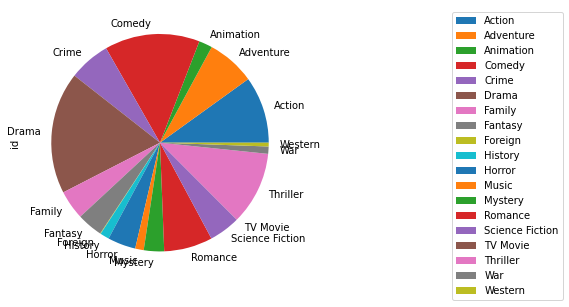

In [36]:
# this is a pie chart that shows how broad each genre is
plot = genre_table.plot.pie(y='id', figsize=(5, 5)).legend(bbox_to_anchor=(2, 1))

<AxesSubplot:>

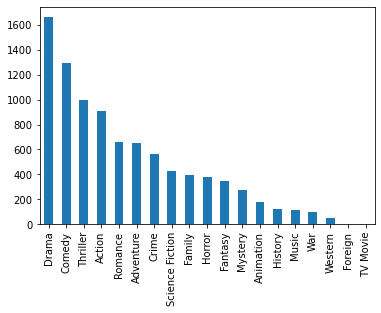

In [37]:
# the bar chart aldo depicting the range of each genre in terms of how many movies affiliate with each genre
genre_df['genre'].value_counts().plot(kind='bar')

In [38]:
mean_by_genre = genre_df.groupby('genre').mean()
mean_by_genre.head()

,id,runtime,popularity,vote_average,vote_count,budget
genre,,,,,,
Action,41797.051705,112.059406,37.828056,6.094169,1413.094609,6.299273e+07
Adventure,41303.300763,112.772519,46.093441,6.195420,1684.387786,7.703537e+07
Animation,47282.273224,90.475410,46.656650,6.455191,1549.284153,8.459542e+07
Comedy,40848.049459,101.168470,22.520391,6.024575,666.826121,3.491967e+07
Crime,40617.580817,111.351687,26.580801,6.357371,902.291297,3.451117e+07


In [39]:
genre_timestamp = genre_df.loc[:, genre_df.columns.isin(['genre', 'release_date'])]
genre_timestamp.head()

,genre,release_date
0,Action,2009-12-10
724,Action,1997-11-14
725,Action,2003-12-25
1601,Action,1988-07-15
1600,Action,2003-09-11


## Data Description
This part includes explanations on the analysis-ready data we have obtained.

### Motivation
We believe that the purpose of performing data analysis to find the genres trends in film production is to deliver valuable information that will later positively impact movie suppliers as well as movie consumers. 
Understanding the general historical movie trends within the entertainment industry is crucial for the success of young or future movie creators/directors/producers/screenwriters. These people can significantly benefit from tailoring their future movies based on what genres are currently trending in the world; our data can also be used to  predict what kinds of movies are most likely to succeed financially. Hence, movie suppliers could use our project's data for their market reseacrh analysis. 
Our results can be advantageous for future researchers analyzing the connections between global events or other external factors and the popularity of certain genres overtime. 
For movie consumers, having a deeper insight on the importance of movie genres and its impact on the movies' success might bring them to making an improved movie choice and selection: perhaps they would want to explore some genres that were the most influential during certain periods of time and see why was that. 


### Composition
The instances in our dataset represent movies; information about each movie contains its characteristics, as well as the public’s response  to the movie in terms of ratings, votes, popularity, and demand expressed through movie's generated revenues. Currently, the cleaned version of our dataset contains 3400 instances in total (movies).
The dataset is definitely a small sample representative of a larger set (millions) of movies worldwide included in either The Movie DataBase or International Movie DataBase platforms online. At the same time, the representativeness could be fairly validated since the movies in our dataset belong to many different kinds of genres and include a slice of relatively popular movies many people would be are familiar with.
The original datasets we have used include 5000 movies and 85,000 movies, yet we decided to keep only those instances that won't have any crucial characteristeics missing from them. That way, there are higher chances for us to evaluate the data more accurately (without leaving some instances from the analysis-ready data out). 
Moreover, the dataset contents should not be considered confidential since they are available to the public freely and were to some extent created from the people’s response to the movies. Analyzing the patterns with movies also shouldn’t be in any way offensive or insulting to the people. 
### Collection process
The datasets utilized in our project were found and imported from the Kaggle database that were originally taken from two of the biggest well-known and official movie databases:
1. https://www.kaggle.com/gabrielbc/movie-data-i-genres “TMDB 5000 movie dataset” (2 files) that was generated from the TMDB API;
2. https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset?select=IMDb+movies.csv “IMDB extensive movie dataset” in Kaggle with more than 80,000 movies extracted from the IMDB API by Stefano Leone.
The data we have collected includes movies from as early as 1927 till 2016 - the data timeline is almost 90 years.

### Preprocessing/cleaning/labeling


### Uses
Currently, the dataset can not be anywhere publicly been used for any tasks already? If so, please provide a description. • Is there a repository that links to any or all papers or systems that use the dataset? If so, please provide a link or other access point. • What (other) tasks could the dataset be used for? • Is there anything about the composition of the dataset or the way it was collected and preprocessed/cleaned/labeled that might impact future uses? For example, is there anything that a future user might need to know to avoid uses that could result in unfair treatment of individuals or groups (e.g., stereotyping, quality of service issues) or other undesirable harms (e.g., financial harms, legal risks) If so, please provide a description. Is there anything a future user could do to mitigate these undesirable harms? • Are there tasks for which the dataset should not be used? If so, please provide a description



## Data Limitations
The outline of potential problems with our chosen dataset:
- Since our dataset includes around 3,600 movies with the majority being popular to a certain degree (predominantly in the US market), it might seem like our data can be a limited representation of the movies in the market; that means that our outcomes and analysis of the genres trends can turn out biased in terms of generating genre trends only from a small number of movies. In other words, the dataset we will use might seem like an inaccurate sample taken from a big population of variables. 
- It is important to note that our dataset only includes movies up to year 2016. Therefore, there is a 4-year gap of movies released between 2016 and 2020, so we would not be able to work with the recent movies and idenfity the genres trending during the recent years. 
- For this project, it is merely impossible to be able to examine all the movies (even with focusing on one country’s market) because of the immense size of movie markets. Even if we hope that our dataset has those movies that has a great influence on the genres popularity during certain years, there is a chance that our data analytics will lead to figuring out erroneous trends. 
- If our team project will potentially be used by someone trying to  predict how a genre of a movie influences its success in the future,  our relatively narrow range of movies can bring harmful consequences for that person. Particularly,  those people could be misinformed and later produce a movie that would not reach high popularity and a large box office. 
- We are heavily relying on the dataset’s accurately distributing which movie belongs to which combination of genres; hence, we have to recognize the potential imprecision of results if the genres were allocated for a certain movie wrongly.

## Questions for reviewers
- How would you distribute the significance of each genre for movies with multiple genres?
- With our data having a large number of attributes that are not expressed in numbers (like actors or production companies), what could be some other efficient ways for us to analyze our qualitative data about movies? 
- Would it make sense to import another dataset that only shows which genres were the most popular for each year in order to: compare our results to the trends from another dataset for improved accuracy (or also for being able to answer our research question about the relationship between the time period’s most successful movies and its trending genres in general)?